<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/tarea_9/practicaSimPy01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Introducción a SimPy
## Iván Ulloa

In [ ]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simpy
import random
import decimal
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# 1-2 minutos un nuevo vehiculo
MAX_VEHICULOS = 57 
TIEMPO_SIMULACION = 60

comparar={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado, tiempo_traslado):
        self.env=environment
        self.maquinas = simpy.Resource(environment, num_maquinas)
        self.tiempo_lavado = tiempo_lavado
        self.tiempo_traslado = tiempo_traslado
        
    def lavar_vehiculo(self, vehiculo):
        yield self.env.timeout(random.randint(int(self.tiempo_lavado-AUX), int(self.tiempo_lavado+AUX)))

        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))

    def traslado_vehiculo(self, vehiculo):
        yield self.env.timeout(self.tiempo_traslado)

        print(f'Vehiculo  {vehiculo} trasladado')
        

def llegada_vehiculo(env, nombre, lavanderia):  
    print('Se traslada el vehiculo a la maquina: %s a la hora %.2f.' % (nombre, env.now))
    yield env.process(lavanderia.traslado_vehiculo(nombre))
    print('Vehiculo %s termino su traslado a las %.2f.' % (nombre, env.now))
    
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    with lavanderia.maquinas.request() as maquina:
        yield maquina
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        print('Vehiculo %s lavado completo a las %.2f.' % (nombre, env.now))

        k=env.now
    
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo, traslado, nombre):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado, traslado)

    for i in range(5):
        env.process(llegada_vehiculo(env, f'{nombre}-%d'%(i+1),lavanderia))
    
    while True:
        yield env.timeout(random.randint(int(intervalo), int(intervalo+1)))
        i+=1
        env.process(llegada_vehiculo(env,f'{nombre}-%d'%(i+1),lavanderia))

Se traslada el vehiculo a la maquina: BUS-1 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-2 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-3 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-4 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-5 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-1 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-2 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-3 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-4 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-5 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-1 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-2 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-3 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-4 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-5 a la hora 0.00.
Se traslada el vehiculo a la maquina: FU

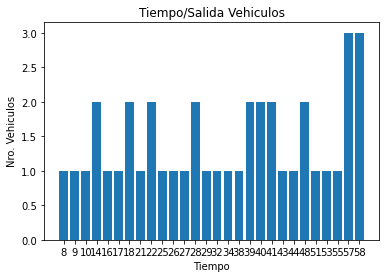

In [ ]:
tiempo={}
random.seed(77)
INTERVALO_LLEGADA = 1
NUM_MAQUINAS = 3

env = simpy.Environment()
# BUS
TIPO_VEHICULO = 'BUS'
TIEMPO_TRASLADO = 4
TIEMPO_LAVADO = 17.5 
AUX = 2.5

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA, TIEMPO_TRASLADO, TIPO_VEHICULO))
# AUTOMOVIL
TIPO_VEHICULO = 'AUTOMOVIL'
TIEMPO_TRASLADO = 1
TIEMPO_LAVADO = 8.5
AUX = 1.5

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA, TIEMPO_TRASLADO, TIPO_VEHICULO))
# FURGONETA
TIPO_VEHICULO = 'FURGONETA'
TIEMPO_TRASLADO = 2
TIEMPO_LAVADO = 13.5
AUX = 1.5

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA, TIEMPO_TRASLADO, TIPO_VEHICULO))

env.run(until = TIEMPO_SIMULACION)

comparar[3] = tiempo
print(comparar[3])

etiqueta = list(comparar[3].keys())
valores = list(comparar[3].values())

plt.bar(range(len(comparar[3])), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

Se traslada el vehiculo a la maquina: BUS-1 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-2 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-3 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-4 a la hora 0.00.
Se traslada el vehiculo a la maquina: BUS-5 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-1 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-2 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-3 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-4 a la hora 0.00.
Se traslada el vehiculo a la maquina: AUTOMOVIL-5 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-1 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-2 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-3 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-4 a la hora 0.00.
Se traslada el vehiculo a la maquina: FURGONETA-5 a la hora 0.00.
Se traslada el vehiculo a la maquina: FU

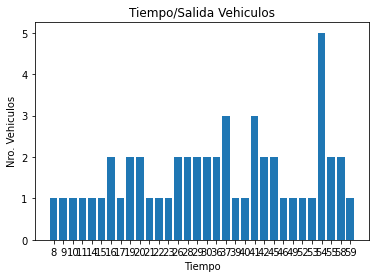

In [ ]:
tiempo={}
random.seed(77)
INTERVALO_LLEGADA = 1
NUM_MAQUINAS = 4

env = simpy.Environment()
# BUS
TIPO_VEHICULO = 'BUS'
TIEMPO_TRASLADO = 4
TIEMPO_LAVADO = 17.5 
AUX = 2.5

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA, TIEMPO_TRASLADO, TIPO_VEHICULO))
# AUTOMOVIL
TIPO_VEHICULO = 'AUTOMOVIL'
TIEMPO_TRASLADO = 1
TIEMPO_LAVADO = 8.5
AUX = 1.5

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA, TIEMPO_TRASLADO, TIPO_VEHICULO))
# FURGONETA
TIPO_VEHICULO = 'FURGONETA'
TIEMPO_TRASLADO = 2
TIEMPO_LAVADO = 13.5
AUX = 1.5

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA, TIEMPO_TRASLADO, TIPO_VEHICULO))

env.run(until = TIEMPO_SIMULACION)

comparar[4] = tiempo
print(comparar[4])

etiqueta = list(comparar[4].keys())
valores = list(comparar[4].values())

plt.bar(range(len(comparar[4])), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

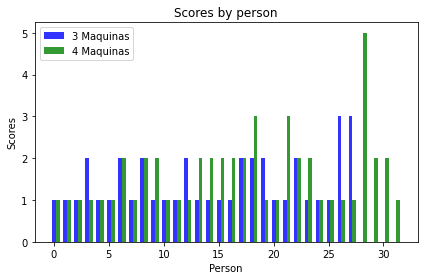

In [ ]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

etiqueta = list(comparar[3].keys())
valores = list(comparar[3].values())
rects1 = plt.bar(range(len(comparar[3])), valores, bar_width, alpha=opacity, color='b', label='3 Maquinas')

etiqueta = list(comparar[4].keys())
valores = list(comparar[4].values())
rects2 = plt.bar(np.arange(len(comparar[4])) + bar_width, valores, bar_width, alpha=opacity, color='g', label='4 Maquinas')

plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.legend()

plt.tight_layout()
plt.show()